In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state= 2)
X[:5], y[:5]

(array([[ 0.84740302,  0.50468136],
        [-0.7461103 ,  0.23892705],
        [-0.27472402, -0.72303049],
        [-0.87205036, -0.5356022 ],
        [ 0.46764515, -0.67950595]]), array([0, 1, 1, 0, 1]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label":y})
circles[:5]

,X1,X2,label
0,0.847403,0.504681,0
1,-0.746110,0.238927,1
2,-0.274724,-0.723030,1
3,-0.872050,-0.535602,0
4,0.467645,-0.679506,1


In [ ]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

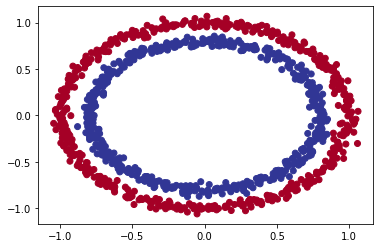

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],  y=X[:,1],  c= y, cmap = plt.cm.RdYlBu);

In [ ]:
circles.label.shape

(1000,)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.8474,  0.5047],
         [-0.7461,  0.2389],
         [-0.2747, -0.7230],
         [-0.8721, -0.5356],
         [ 0.4676, -0.6795]]), tensor([0., 1., 1., 0., 1.]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([800, 2])
torch.Size([200, 2])
torch.Size([800])
torch.Size([200])


In [ ]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class Circlemodelv0(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.layer1= nn.Linear(in_features= 2, out_features=5)
    self.layer2= nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer2(self.layer1(x))



model0 = Circlemodelv0().to(device)
print(model0)


Circlemodelv0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
model0 = nn.Sequential(
    nn.Linear(in_features= 2, out_features= 5),
    nn.Linear(in_features= 5, out_features= 1)
).to(device)

print(model0)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr= 0.1)


In [ ]:
def accuracy_func(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
y_logits = model0(X_test).to(device)
print(y_logits[:5])

tensor([[-0.2494],
        [-0.3593],
        [-0.3619],
        [-0.5117],
        [-0.2488]], grad_fn=<SliceBackward0>)


In [ ]:
y_test[:5]

tensor([1., 1., 0., 1., 0.])

In [ ]:
torch.manual_seed(2)
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for i in range(epochs):

  
     model0.train()
     y_logits = model0(X_train).squeeze()
     y_train_pred = torch.round(torch.sigmoid(y_logits))

     loss = loss_fn(y_logits, y_train)
     acc = accuracy_func(y_train, y_train_pred)

     optimizer.zero_grad()
     loss.backward()
     optimizer.step()


     model0.eval()
     with torch.inference_mode():


        y_logits1 = model0(X_test).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits1))

        test_loss = loss_fn(y_test, y_logits1)
        test_acc = accuracy_func(y_test, y_pred)

  
     if i % 10 == 0:

        print(f"Epoch:{i} , loss:{loss:.5f}, accuracy:{acc:.2f}%|, test_loss:{test_loss:.2f}, test_accuracy:{test_acc:.2f}%")



Epoch:0 , loss:0.69487, accuracy:50.75%|, test_loss:1.01, test_accuracy:47.00%
Epoch:10 , loss:0.69447, accuracy:50.62%|, test_loss:1.01, test_accuracy:46.50%
Epoch:20 , loss:0.69417, accuracy:50.88%|, test_loss:1.01, test_accuracy:46.00%
Epoch:30 , loss:0.69394, accuracy:50.88%|, test_loss:1.01, test_accuracy:46.00%
Epoch:40 , loss:0.69376, accuracy:51.00%|, test_loss:1.01, test_accuracy:46.00%
Epoch:50 , loss:0.69363, accuracy:51.12%|, test_loss:1.01, test_accuracy:46.50%
Epoch:60 , loss:0.69353, accuracy:50.75%|, test_loss:1.01, test_accuracy:46.50%
Epoch:70 , loss:0.69344, accuracy:50.25%|, test_loss:1.01, test_accuracy:48.00%
Epoch:80 , loss:0.69338, accuracy:50.50%|, test_loss:1.01, test_accuracy:48.50%
Epoch:90 , loss:0.69333, accuracy:50.00%|, test_loss:1.01, test_accuracy:48.50%


In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper functions already available, skipping download.')

else:
  print('Downloading Functions.')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper functions already available, skipping download.


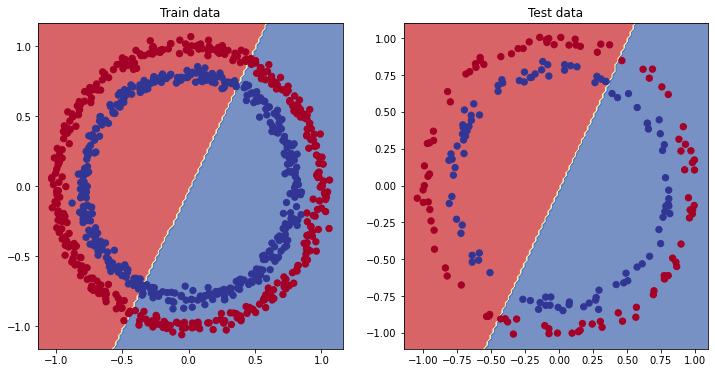

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Train data')
plot_decision_boundary(model0, X_train, y_train)


plt.subplot(1,2,2)
plt.title('Test data')
plot_decision_boundary(model0, X_test, y_test)



In [ ]:
class Circlemodelv1(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer1= nn.Linear(in_features= 2, out_features=10)
    self.layer2= nn.Linear(in_features=10, out_features=6)
    self.layer3= nn.Linear(in_features=6, out_features=1)

  def forward(self,X):
    return self.layer3(self.layer2(self.layer1(X)))



model1 = Circlemodelv1().to(device)
print(model1)

Circlemodelv1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=6, bias=True)
  (layer3): Linear(in_features=6, out_features=1, bias=True)
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model1.parameters(), lr= 0.1)

In [ ]:
torch.manual_seed(30)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for i in range(epochs):
  
  model1.train()
  y_logits = model1(X_train).squeeze()
  y_train_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_func(y_train, y_train_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model1.eval()
  with torch.inference_mode():

    y_logits1 = model1(X_test).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits1))

    test_loss = loss_fn(y_logits1, y_test)
    test_acc = accuracy_func(y_test, y_pred)

  
  if i % 100 == 0:
    print(f"Epoch:{i} |, loss:{loss:.5f}, accuracy:{acc:.2f}%|, test_loss:{test_loss:.5f}, test_accuracy:{test_acc:.2f}%")


Epoch:0 |, loss:0.70472, accuracy:54.00%|, test_loss:0.70503, test_accuracy:57.00%
Epoch:100 |, loss:0.69383, accuracy:50.25%|, test_loss:0.69434, test_accuracy:49.00%
Epoch:200 |, loss:0.69325, accuracy:50.25%|, test_loss:0.69372, test_accuracy:48.00%
Epoch:300 |, loss:0.69311, accuracy:50.75%|, test_loss:0.69369, test_accuracy:46.50%
Epoch:400 |, loss:0.69306, accuracy:49.88%|, test_loss:0.69377, test_accuracy:50.50%
Epoch:500 |, loss:0.69305, accuracy:50.25%|, test_loss:0.69384, test_accuracy:48.00%
Epoch:600 |, loss:0.69304, accuracy:50.88%|, test_loss:0.69390, test_accuracy:46.50%
Epoch:700 |, loss:0.69304, accuracy:50.75%|, test_loss:0.69394, test_accuracy:46.00%
Epoch:800 |, loss:0.69304, accuracy:51.12%|, test_loss:0.69396, test_accuracy:46.00%
Epoch:900 |, loss:0.69304, accuracy:50.75%|, test_loss:0.69397, test_accuracy:46.00%


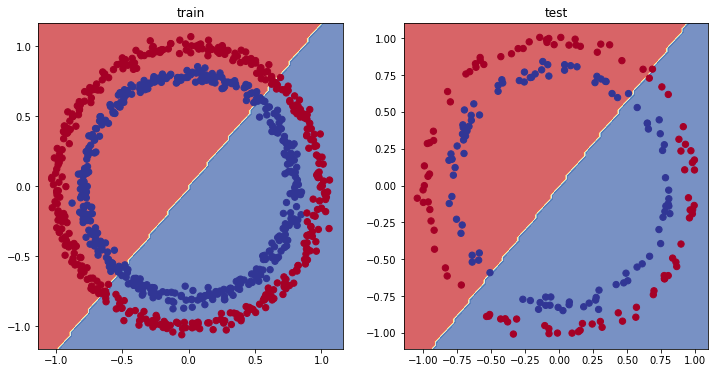

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model1, X_test, y_test)

In [ ]:
weight = 0.3
bias = 0.7
start = 0
stop = 1
step = 0.01

X = torch.arange(start, stop, step).unsqueeze(dim= 1)

y = weight * X + bias

print(y[-5:]), print(X[-5:])


tensor([[0.9850],
        [0.9880],
        [0.9910],
        [0.9940],
        [0.9970]])
tensor([[0.9500],
        [0.9600],
        [0.9700],
        [0.9800],
        [0.9900]])


(None, None)

In [ ]:
size_split = int(0.8 * len(X))
X_train, y_train = X[:size_split], y[:size_split]
X_test, y_test = X[size_split:], y[size_split:]

print(X_train.shape)
print(len(y_train))
print(len(X_test))
print(len(y_test))

torch.Size([80, 1])
80
20
20


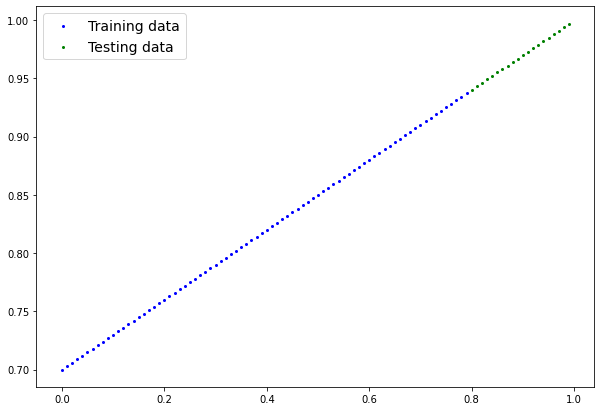

In [ ]:
plot_predictions(train_data= X_train, train_labels= y_train, test_data= X_test, test_labels= y_test)

In [ ]:
model2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 5),
    nn.Linear(5, 1)
).to(device)


model2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model2.parameters(), lr = 0.1)

In [ ]:
torch.manual_seed(30)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for i in range(epochs):
  
  model2.train()
  y_train_pred = model2(X_train)
  loss = loss_fn(y_train_pred, y_train)
  

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model2.eval()
  with torch.inference_mode():

    y_test_pred = model2(X_test)
    test_loss = loss_fn(y_test_pred, y_test)

  
  if i % 100 == 0:
    print(f"Epoch:{i} |, loss:{loss:.5f}|, test_loss:{test_loss:.5f}")

Epoch:0 |, loss:0.05188|, test_loss:0.01127
Epoch:100 |, loss:0.04935|, test_loss:0.00720
Epoch:200 |, loss:0.05452|, test_loss:0.01622
Epoch:300 |, loss:0.04924|, test_loss:0.01052
Epoch:400 |, loss:0.05454|, test_loss:0.01428
Epoch:500 |, loss:0.05438|, test_loss:0.01734
Epoch:600 |, loss:0.05446|, test_loss:0.01369
Epoch:700 |, loss:0.05176|, test_loss:0.01365
Epoch:800 |, loss:0.05169|, test_loss:0.01711
Epoch:900 |, loss:0.04923|, test_loss:0.01466


tensor([[0.8359],
        [0.8377],
        [0.8394],
        [0.8411],
        [0.8428]])


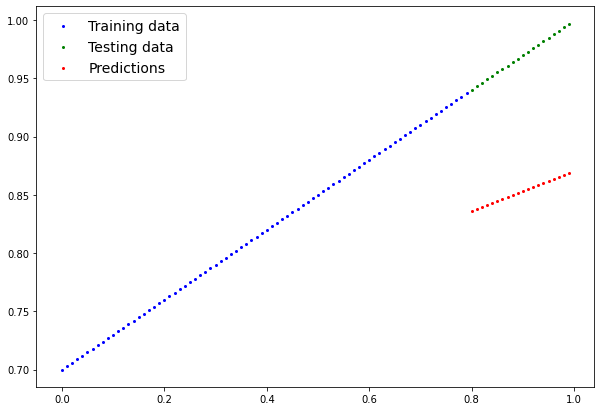

In [ ]:
  model2.eval()
  with torch.inference_mode():

    y_pred = model2(X_test)
    print(y_pred[:5])

  plot_predictions(train_data= X_train, train_labels= y_train, test_data= X_test, test_labels= y_test, predictions= y_pred)


In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state= 2)
X[:5], y[:5]

(array([[ 0.84740302,  0.50468136],
        [-0.7461103 ,  0.23892705],
        [-0.27472402, -0.72303049],
        [-0.87205036, -0.5356022 ],
        [ 0.46764515, -0.67950595]]), array([0, 1, 1, 0, 1]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label":y})
circles[:5]

,X1,X2,label
0,0.847403,0.504681,0
1,-0.746110,0.238927,1
2,-0.274724,-0.723030,1
3,-0.872050,-0.535602,0
4,0.467645,-0.679506,1


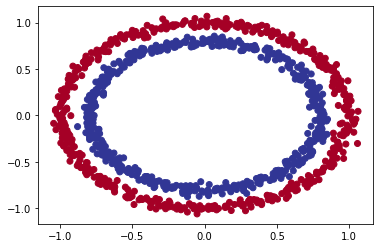

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],  y=X[:,1],  c= y, cmap = plt.cm.RdYlBu);

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.8474,  0.5047],
         [-0.7461,  0.2389],
         [-0.2747, -0.7230],
         [-0.8721, -0.5356],
         [ 0.4676, -0.6795]]), tensor([0., 1., 1., 0., 1.]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 12 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([800, 2])
torch.Size([200, 2])
torch.Size([800])
torch.Size([200])


In [ ]:
class Circlemodelv3(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.layer1= nn.Linear(in_features= 2, out_features=5)
    self.layer2= nn.Linear(in_features=5, out_features=10)
    self.layer3= nn.Linear(in_features=10, out_features=1)
    self.relu= nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))



model3 = Circlemodelv3().to(device)
print(model3)

Circlemodelv3(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(2)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for i in range(epochs):

  
     model0.train()
     y_logits = model3(X_train).squeeze()
     y_train_pred = torch.round(torch.sigmoid(y_logits))

     loss = loss_fn(y_logits, y_train)
     acc = accuracy_func(y_train, y_train_pred)

     optimizer.zero_grad()
     loss.backward()
     optimizer.step()


     model3.eval()
     with torch.inference_mode():


        y_logits1 = model3(X_test).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits1))

        test_loss = loss_fn( y_logits1, y_test)
        test_acc = accuracy_func(y_test, y_pred)

  
     if i % 100 == 0:

        print(f"Epoch:{i} , loss:{loss:.5f}, accuracy:{acc:.2f}%|, test_loss:{test_loss:.2f}, test_accuracy:{test_acc:.2f}%")


Epoch:0 , loss:0.67605, accuracy:60.12%|, test_loss:0.68, test_accuracy:58.50%
Epoch:100 , loss:0.66834, accuracy:65.75%|, test_loss:0.67, test_accuracy:64.50%
Epoch:200 , loss:0.65648, accuracy:68.50%|, test_loss:0.66, test_accuracy:69.50%
Epoch:300 , loss:0.63643, accuracy:75.25%|, test_loss:0.64, test_accuracy:77.00%
Epoch:400 , loss:0.60265, accuracy:81.62%|, test_loss:0.60, test_accuracy:81.50%
Epoch:500 , loss:0.55117, accuracy:84.00%|, test_loss:0.54, test_accuracy:84.50%
Epoch:600 , loss:0.48292, accuracy:86.00%|, test_loss:0.47, test_accuracy:88.50%
Epoch:700 , loss:0.40962, accuracy:88.12%|, test_loss:0.40, test_accuracy:89.50%
Epoch:800 , loss:0.44553, accuracy:79.38%|, test_loss:0.46, test_accuracy:73.50%
Epoch:900 , loss:0.40518, accuracy:82.88%|, test_loss:0.43, test_accuracy:74.00%


In [ ]:
model3.eval()
with torch.inference_mode():

    y_pred = torch.round(torch.sigmoid(model3(X_test))).squeeze()
    print(f"Predicted:, {y_pred[:5]}")
    print(f"Actual:, {y[:5]}")

Predicted:, tensor([1., 1., 0., 1., 1.])
Actual:, tensor([0., 1., 1., 0., 1.])


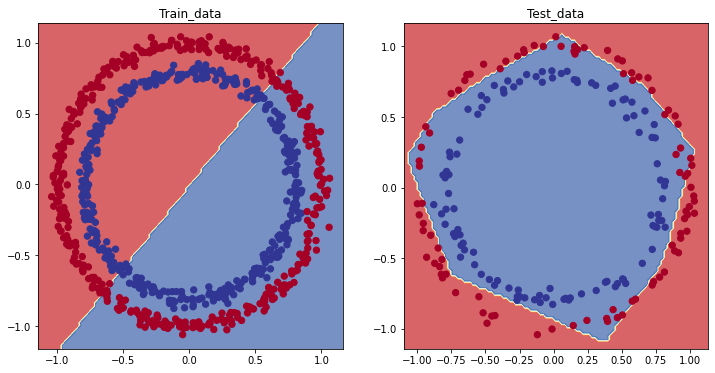

In [ ]:
plt.figure(figsize= (12, 6))
plt.subplot(1,2,1)
plt.title('Train_data')
plot_decision_boundary(model1, X_train, y_train)

plt.subplot(1,2,2)
plt.title('Test_data')
plot_decision_boundary(model3, X_test, y_test)


In [ ]:
A = torch.arange(-10, 10, 1)
print(A)

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])


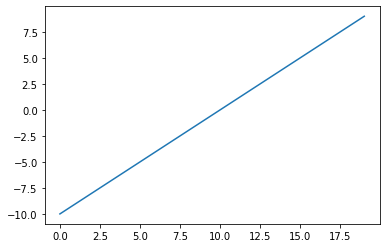

In [ ]:
plt.plot(A)

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)


relu(A)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

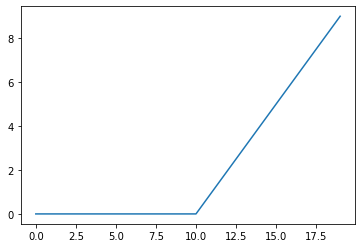

In [ ]:
plt.plot(relu(A))

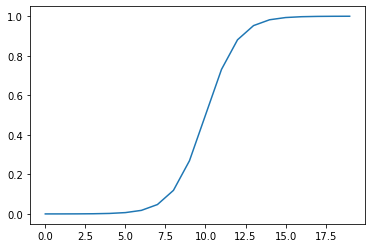

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


plt.plot(sigmoid(A))

[[ 1.15232915  6.10745464]
 [-8.69380102  5.55720101]
 [ 0.23024192  8.66269151]
 [ 8.18223886  4.97312766]
 [-7.7675401   2.68558928]]
[0 2 0 1 2]
tensor([[ 1.1523,  6.1075],
        [-8.6938,  5.5572],
        [ 0.2302,  8.6627],
        [ 8.1822,  4.9731],
        [-7.7675,  2.6856]])
tensor([0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 3])
800
200
800
200


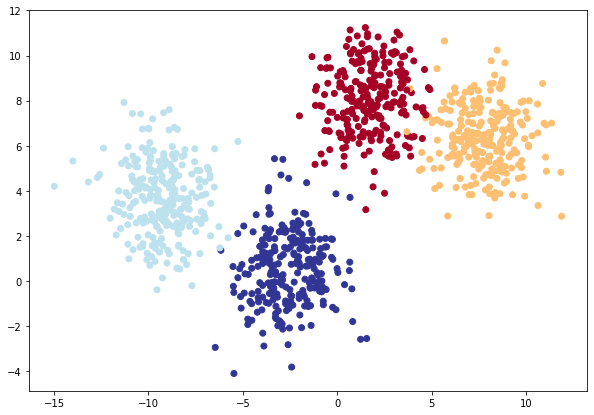

In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


NUM_FEATURES= 2
NUM_CLASSES= 4
random_seed= 20

X_blob, y_blob = make_blobs(n_samples= 1000, centers= NUM_CLASSES, n_features= NUM_FEATURES,  cluster_std= 1.5, random_state= 20)

print(X_blob[:5])
print(y_blob[:5])

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

print(X_blob[:5])
print(y_blob[:15])

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size= 0.2, random_state= random_seed)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

plt.figure(figsize= (10, 7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c= y_blob, cmap = plt.cm.RdYlBu);



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
from torch import nn

class Blobmodel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units= 8):
    super().__init__()
    self.stack_layer = nn.Sequential(
        
        nn.Linear(input_features, hidden_units),
        nn.Linear(hidden_units, hidden_units),
        nn.Linear(hidden_units, output_features),

    )


  def forward(self, x):
     return self.stack_layer(x)



model4 = Blobmodel(NUM_FEATURES,  NUM_CLASSES, hidden_units= 8).to(device)

model4

Blobmodel(
  (stack_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( params= model4.parameters(), lr = 0.1)

In [ ]:
model4(X_train.to(device))[:5]

tensor([[ 0.1585, -0.0055, -0.1927, -0.4785],
        [-0.1468, -0.0845,  0.0632, -0.6180],
        [ 0.0148, -0.0509, -0.0580, -0.4907],
        [-0.0117, -0.0589, -0.0338, -0.4954],
        [-0.0086, -0.0511, -0.0486, -0.5396]], grad_fn=<SliceBackward0>)

In [ ]:
model4(X_train.to(device))[10].shape

torch.Size([4])

In [ ]:
X_test.shape 

torch.Size([200, 2])

In [ ]:
y_logits= model4(X_test.to(device))[:5]
y_pred = torch.softmax(y_logits, dim= 1)
print(y_pred)
print(y_pred[0])
print(torch.argmax(y_pred[2]))

tensor([[0.2835, 0.2741, 0.2765, 0.1659],
        [0.2690, 0.1791, 0.1959, 0.3560],
        [0.2787, 0.2749, 0.2833, 0.1632],
        [0.3331, 0.2715, 0.2172, 0.1782],
        [0.3187, 0.2700, 0.2318, 0.1795]], grad_fn=<SoftmaxBackward0>)
tensor([0.2835, 0.2741, 0.2765, 0.1659], grad_fn=<SelectBackward0>)
tensor(2)


In [ ]:
print(torch.sum(y_pred[4]))

tensor(1.0000, grad_fn=<SumBackward0>)


In [ ]:
y_logits= model4(X_test.to(device))
print(y_logits[:5])
print(torch.softmax(y_logits, dim= 1).argmax(dim=1))

tensor([[-0.0184, -0.0521, -0.0431, -0.5541],
        [ 0.2824, -0.1246, -0.0346,  0.5626],
        [-0.0426, -0.0564, -0.0262, -0.5779],
        [ 0.2053,  0.0009, -0.2221, -0.4203],
        [ 0.1488, -0.0169, -0.1692, -0.4251]], grad_fn=<SliceBackward0>)
tensor([0, 3, 2, 0, 0, 3, 2, 3, 0, 3, 0, 2, 3, 3, 2, 3, 3, 3, 0, 0, 0, 3, 2, 0,
        0, 0, 3, 2, 1, 3, 3, 3, 0, 0, 2, 3, 0, 3, 2, 0, 3, 2, 3, 2, 0, 2, 0, 2,
        2, 0, 3, 3, 3, 0, 2, 3, 3, 3, 2, 0, 0, 3, 3, 2, 2, 0, 0, 2, 3, 0, 3, 3,
        3, 2, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 2, 2, 0, 0, 3, 0, 3, 2, 3,
        3, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 0, 0, 3, 2, 3, 3,
        0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 2, 0,
        3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 2, 3, 0, 0, 3, 0, 2, 2, 0, 3, 3, 3, 3, 3,
        3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 2, 0, 2, 3, 2, 0,
        0, 0, 0, 0, 0, 3, 0, 3])


In [ ]:
torch.random_seed= 20
epochs= 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for i in range(epochs):

  model4.train()

  y_logits= model4(X_train)
  y_train_pred= torch.softmax(y_logits, dim= 1).argmax(dim=1)
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_func(y_train, y_train_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model4.eval()
  with torch.inference_mode():
    y_logits1 = model4(X_test)
    y_pred= torch.softmax(y_logits1, dim= 1).argmax(dim= 1)
    testloss= loss_fn(y_logits1, y_pred)
    test_acc= accuracy_func(y_test, y_pred)

  if i % 100 == 0:

      print(f"Epoch:{i}, Loss:{loss:.5f},Accuracy:{acc:.2f}%,|Test_loss{testloss:.5f}, Test_acc:{test_acc:.2f}%")








Epoch:0, Loss:1.52273,Accuracy:14.88%,|Test_loss0.56398, Test_acc:56.50%
Epoch:100, Loss:0.07889,Accuracy:98.38%,|Test_loss0.07796, Test_acc:98.50%
Epoch:200, Loss:0.04663,Accuracy:98.88%,|Test_loss0.04838, Test_acc:98.50%
Epoch:300, Loss:0.03734,Accuracy:98.88%,|Test_loss0.03795, Test_acc:98.50%
Epoch:400, Loss:0.03257,Accuracy:99.12%,|Test_loss0.03290, Test_acc:98.50%
Epoch:500, Loss:0.02949,Accuracy:99.25%,|Test_loss0.03007, Test_acc:98.50%
Epoch:600, Loss:0.02724,Accuracy:99.25%,|Test_loss0.02838, Test_acc:98.50%
Epoch:700, Loss:0.02548,Accuracy:99.25%,|Test_loss0.02719, Test_acc:98.00%
Epoch:800, Loss:0.02407,Accuracy:99.25%,|Test_loss0.02623, Test_acc:98.00%
Epoch:900, Loss:0.02291,Accuracy:99.12%,|Test_loss0.02554, Test_acc:98.00%


In [ ]:
model4.eval()
with torch.inference_mode():
    y_logits1 = model4(X_test)
    y_pred= torch.softmax(y_logits1, dim= 1).argmax(dim= 1)
    print(y_pred[:10])
    print(y_test[:10])

tensor([2, 0, 2, 3, 3, 1, 2, 0, 3, 1])
tensor([2, 0, 2, 3, 3, 1, 2, 0, 3, 1])


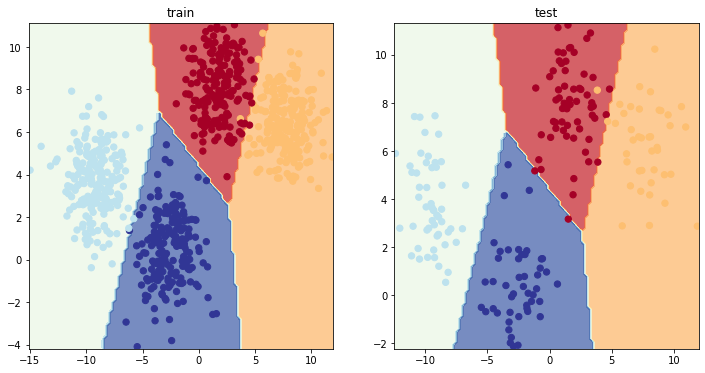

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model4, X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model4, X_test, y_test)
